# Практика

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
from statsmodels.stats.weightstats import _zconfint_generic
%matplotlib inline

## ЦПТ для различных распределений
Возьмите то непрерывное распределение, которое вам больше всего понравится из списка доступных в модуле [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html).

### Сгенерируйте примеры из распределения

In [13]:
# ваш код тут
# например вот такое распределение https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.cosine.html#scipy.stats.halfcauchy
halfcauchy_rv = sts.halfcauchy()
sample = halfcauchy_rv.rvs(100)
sample

array([1.26936760e+00, 3.43962889e-01, 3.83727807e+00, 2.00974873e-01,
       6.22573283e-01, 1.03656664e+00, 1.73231169e-01, 1.10403431e+00,
       9.72285815e-01, 1.23411886e+00, 1.47620537e+00, 1.23064633e+00,
       3.59928391e+00, 6.01041558e-01, 2.54360664e+00, 7.38813313e-01,
       9.56615336e+00, 9.76715503e-01, 6.36567405e-01, 1.42578683e-01,
       1.45814339e-02, 6.03668141e-01, 9.38079077e-01, 5.88165512e-01,
       3.28083255e-01, 8.11142941e-01, 8.99062624e-01, 4.73772063e+00,
       6.08216195e-01, 3.80363003e-01, 2.68386261e+00, 1.54407994e+00,
       1.32507356e-01, 3.08504735e-01, 2.87211398e-01, 2.53433786e-01,
       1.09488208e+00, 1.42769566e+01, 9.22784365e-01, 2.95932375e+01,
       9.36691540e-02, 5.84271355e-01, 8.23071364e-01, 1.52551895e-01,
       1.62977920e-01, 6.81638679e-01, 6.21795529e-01, 3.20962865e+00,
       1.03272609e+00, 1.24679825e+00, 1.90221075e+01, 1.05668344e+00,
       7.08276993e-01, 2.82128148e+00, 5.83265478e-01, 9.19675955e+00,
      

In [14]:
sample.dtype #определяем тип данных

dtype('float64')

In [15]:
real_mean = halfcauchy_rv.mean() # настоящее среднее случайной величины
real_mean

inf

In [16]:
real_var = halfcauchy_rv.var() # настоящая дисперсия случайной величины
real_var

inf

In [17]:
real_std = halfcauchy_rv.std() # настоящая дисперсия случайной величины
print(real_std)

inf


### Постройте гистограмму выборки и теоретическую плотность распределения

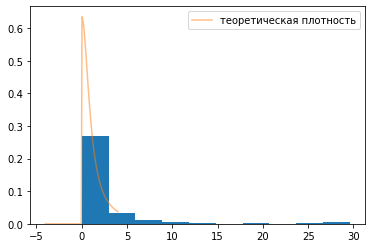

In [19]:
# ваш код тут
plt.hist(sample, density=True)
x = np.linspace(-4,4,100)
pdf = halfcauchy_rv.pdf(x)
plt.plot(x, pdf, label='теоретическая плотность', alpha=0.5)
plt.legend()

In [20]:
sample_mean = sample.mean() # выборочное среднее
print(sample_mean)
sample_var = sample.var() # выборочная дисперсия
print(sample_var)
sample_std = sample.std()
print(sample_std)

2.710044475417825
28.11019245623121
5.301904606481638


### Оценим распределение выборочного среднего для разных объёмов выборок
Для этого постройте на одном полотне гистограмму выборочных средних и теоретическое распределение выборочных средних по ЦПТ для разных объёмов выборок.

Для теоретического распределение используйте настоящие значения мат ожидания и дисперсии (не приближенные на основе выборки).

C:\Users\MrWind\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1870: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


<Figure size 1152x648 with 0 Axes>

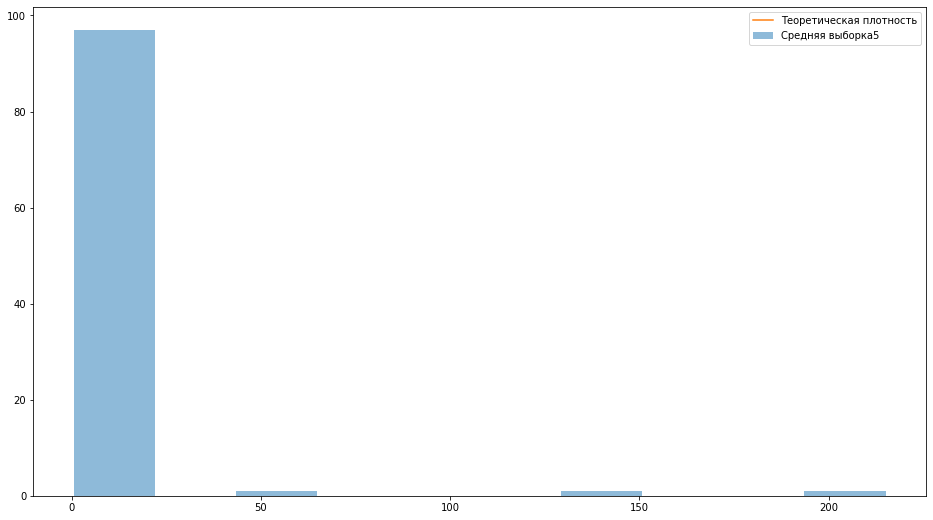

C:\Users\MrWind\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1870: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


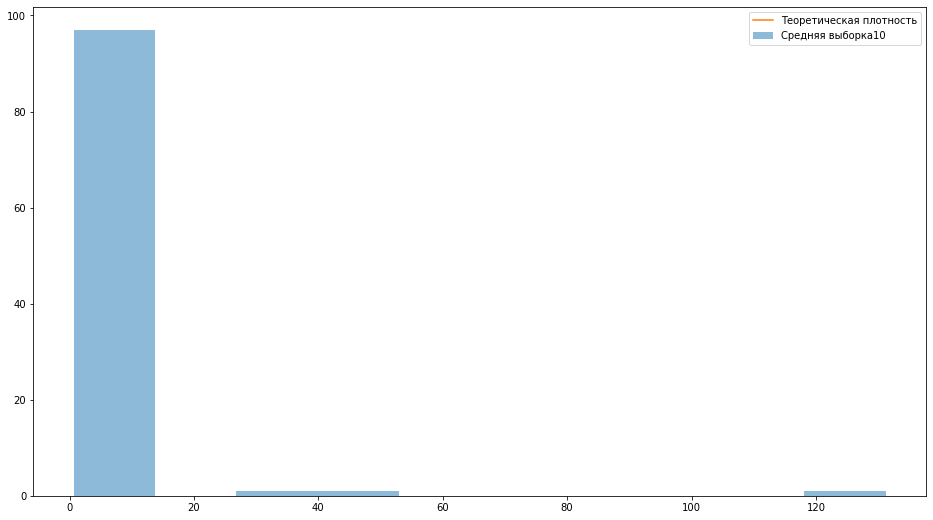

C:\Users\MrWind\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1870: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


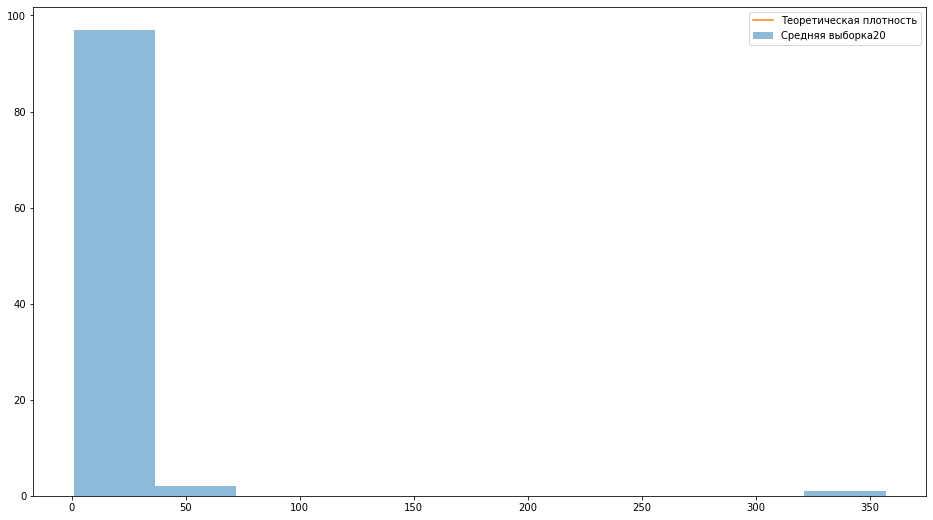

C:\Users\MrWind\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1870: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


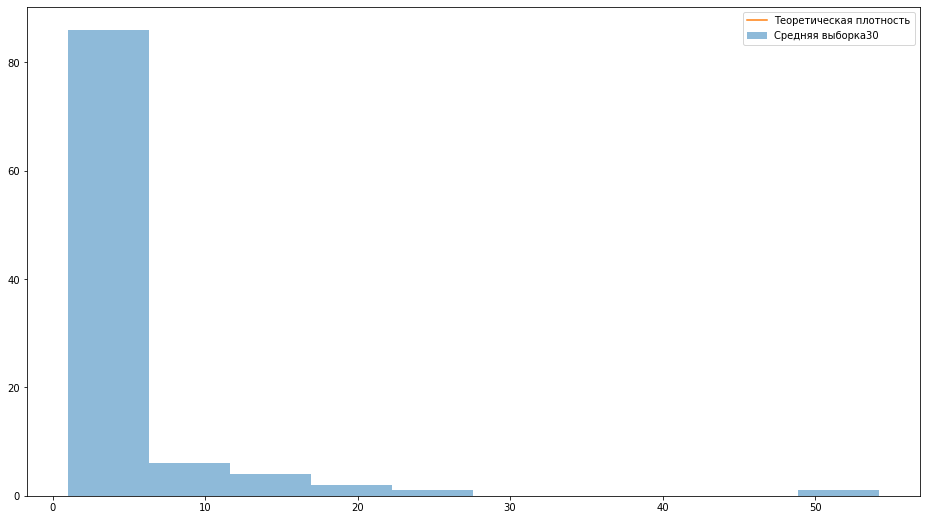

In [24]:
# ваш код тут


plt.figure(figsize=(16,9))
# сгенерируем выборочные средние
for N in [5, 10, 20, 30]:
    means = []
    for i in range(100):
         means.append(np.mean(halfcauchy_rv.rvs(N)))
    plt.figure(figsize=(16,9))
    plt.hist(means, alpha=0.5, label='Средняя выборка' + str(N))
    mean = np.mean(means)
    std = np.std(means)
    norm_rv = sts.norm(loc=real_mean, scale=real_std / np.sqrt(N))
    x = np.linspace(1, 100, 100)
    pdf = norm_rv.pdf(x)
    plt.plot(x, pdf, label='Теоретическая плотность')
    plt.legend()
    plt.show()






Как вы считаете, для выбранного распределения апроксимация распределения выборочного среднего работает хорошо или плохо?
**Ваш ответ:**

In [ ]:
# Нет понимания работы распределения выборочного, потому что не удается вычислить теоретическую плотность

## Доверительный интервал на основе ЦПТ
Возьмите данные для оттока телеком компании, и постройте доверительные интервалы для среднего значения total day calls, используя центральную предельную теорему в разбиении по колонке churn (ушел/не ушел). 

Для оценки дисперсии используйте несмещенную оценку (параметр ddof=1).

Сделайте оценку с использованием явной формулы для z интервала, а затем с помощью функций 
`from statsmodels.stats.weightstats import _zconfint_generic`. Сравните результаты.


Ссылка на данные: https://drive.google.com/file/d/1X_drKqoarnU2Sz2har7uSCsgyhh8Xtz8/view?usp=sharing

In [77]:
# либо загружаем из альтернативного хранилища
url ="https://raw.githubusercontent.com/piton1/DS/Lesson_5/telecom_churn.csv"
df=pd.read_csv(url)
display(df)


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


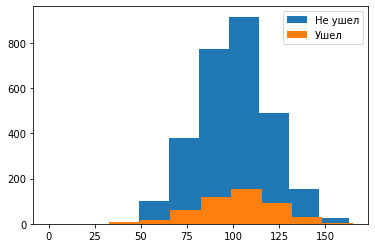

In [78]:
df_true = df.loc[df['churn'] == True, 'total day calls']
df_false = df.loc[df['churn'] == False, 'total day calls']
plt.hist(df_false, label='Не ушел')
plt.hist(df_true, label='Ушел')
plt.legend()
plt.show()


TypeError: title() missing 1 required positional argument: 'label'

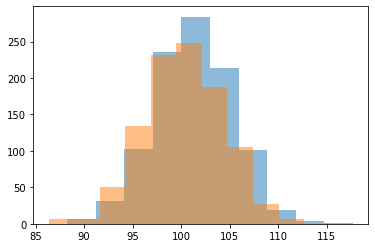

In [80]:
N = 25
df_mean_true = []
df_mean_false = []

for i in range(1000):
    df_mean_true.append(np.mean(np.random.choice(df_true, N)))
    df_mean_false.append(np.mean(np.random.choice(df_false, N)))

plt.figure()
plt.hist(df_mean_true, alpha=0.5, label='Ушел')
plt.hist(df_mean_false, alpha=0.5, label='Не ушел')
plt.title()
plt.legend()
plt.show()

In [81]:
# оценить дисперсию по несмещенной оценке ddof=1
df_true_ddof = np.std(df_true, ddof = 1)
df_false_ddof = np.std(df_false, ddof = 1)

print (df_true_ddof)
print (df_false_ddof)

21.58230721307551
19.801156951805503


In [82]:
zint_true = df_true - 1,96 * df_true_ddof / np.sqrt(N), df_true + 1,96 * df_true_ddof / np.sqrt(N)
zint_false = df_false - 1,96 * df_false_ddof / np.sqrt(N), df_false + 1,96 * df_false_ddof / np.sqrt(N)

print(zint_true, zint_false)


(10      136
15       66
21       88
33      117
41       84
       ... 
3301    112
3304    113
3320    100
3322    104
3323    125
Name: total day calls, Length: 483, dtype: int64, 414.38029849104976, 10      138
15       68
21       90
33      119
41       86
       ... 
3301    114
3304    115
3320    102
3322    106
3323    127
Name: total day calls, Length: 483, dtype: int64, 414.38029849104976) (0       109
1       122
2       113
3        70
4       112
       ... 
3328     76
3329     56
3330    108
3331    104
3332    112
Name: total day calls, Length: 2850, dtype: int64, 380.1822134746657, 0       111
1       124
2       115
3        72
4       114
       ... 
3328     78
3329     58
3330    110
3331    106
3332    114
Name: total day calls, Length: 2850, dtype: int64, 380.1822134746657)


In [83]:
zconfint_true = _zconfint_generic(df_true, df_true_ddof / np.sqrt(N), 0.05, 'two-sided')
zconfint_false = _zconfint_generic(df_false, df_false_ddof / np.sqrt(N), 0.05, 'two-sided')
print(zconfint_true, zconfint_false)
#Значения поменялись с 138 на 145.460109б с 109 на 102.238089, с 111 на 117.761911, что говорит о более высокой точности подсчета, что дает _zconfint_generic



(10      128.539891
15       58.539891
21       80.539891
33      109.539891
41       76.539891
           ...    
3301    104.539891
3304    105.539891
3320     92.539891
3322     96.539891
3323    117.539891
Name: total day calls, Length: 483, dtype: float64, 10      145.460109
15       75.460109
21       97.460109
33      126.460109
41       93.460109
           ...    
3301    121.460109
3304    122.460109
3320    109.460109
3322    113.460109
3323    134.460109
Name: total day calls, Length: 483, dtype: float64) (0       102.238089
1       115.238089
2       106.238089
3        63.238089
4       105.238089
           ...    
3328     69.238089
3329     49.238089
3330    101.238089
3331     97.238089
3332    105.238089
Name: total day calls, Length: 2850, dtype: float64, 0       117.761911
1       130.761911
2       121.761911
3        78.761911
4       120.761911
           ...    
3328     84.761911
3329     64.761911
3330    116.761911
3331    112.761911
3332    120.761911
Name: